Copyright (C) 2022 Greenweaves Software Limited

This is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This software is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with GNU Emacs.  If not, see <http://www.gnu.org/licenses/>

In [1]:
from os.path           import join
from matplotlib.pyplot import figure, savefig, show, title
from pandas            import read_csv
from seaborn           import heatmap

In [2]:
def read_and_split(path      = r'G:\My Drive\Machine Learning\Cholangiocarcinoma_ML\Data_Files',
                   file_name = 'cc_cancer_mutations_post_LASSO',
                   ext       = 'csv'):
    def extract(df,cancer_type=0):
        return df.loc[df.cancer_type==cancer_type,].drop(['cancer_type'],
                                               axis    = 1,
                                               inplace = False)
    df = read_csv(join(path,f'{file_name}.{ext}'))
    return (extract(df,cancer_type=0),
            extract(df,cancer_type=1))

In [3]:
def decorate_plot(ax    = None,
                  title = 'Cancer'):
    ax.set_title(title)
    ax.tick_params(which       = 'both',
                   bottom      = False,
                   top         = False,
                   labelleft   = False,
                   labelbottom = False )

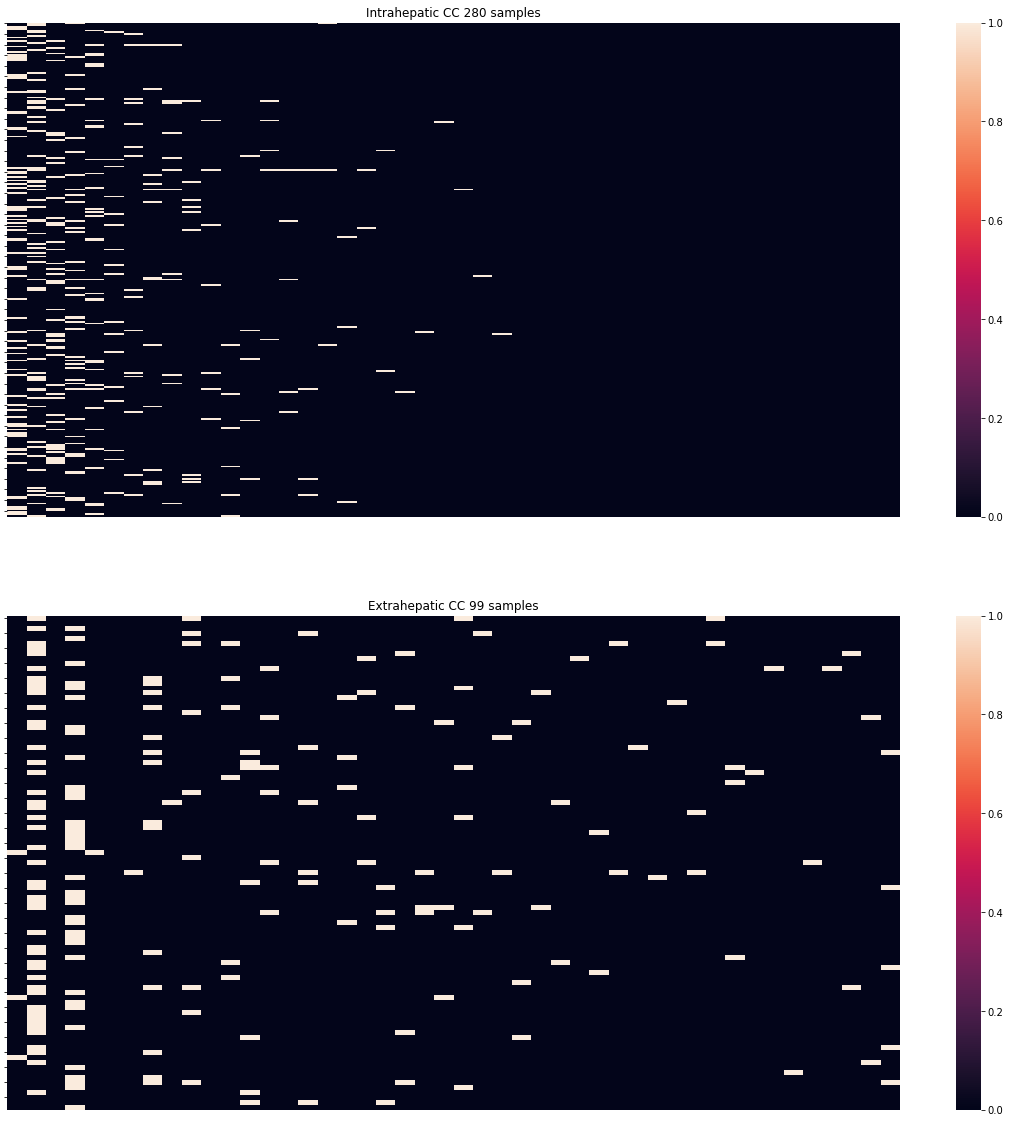

In [4]:
if __name__=='__main__':
    other_cancer,cholangiocarcinoma = read_and_split()
    counts_other                    = other_cancer.sum(axis=0)
    sorted_on_counts                = counts_other.sort_values(ascending=False)
    counts_cholangiocarcinoma       = cholangiocarcinoma.sum(axis=0)
    keys = sorted_on_counts.keys()

    fig             = figure(figsize=(20,20))
    axs             = fig.subplots(2)
    decorate_plot(ax    = axs[0],
                  title = f'Intrahepatic CC {other_cancer.shape[0]} samples')
    heatmap(other_cancer[keys.tolist()],
            ax   = axs[0],
            vmin = 0,
            vmax = 1)
    decorate_plot(ax    = axs[1],
                  title = f'Extrahepatic CC {cholangiocarcinoma.shape[0]} samples')
    heatmap(cholangiocarcinoma[keys.tolist()],
            ax   = axs[1],
            vmin = 0,
            vmax = 1)
    savefig('G:\My Drive\Machine Learning\Cholangiocarcinoma_ML\Images\cc_cancerEDA_post_LASSO.png')
    show()